# Grafos

In [107]:
import numpy as np
from numpy import linalg as LA
import networkx as nx #LIBRERRIA DE GRAFOS
import matplotlib.pyplot as plt

In [254]:
def createEdges(edges, directflag):
    newEdges = []
    for e in edges:
        newEdges.append((e[0],e[1],.5))
        if directflag == 1: newEdges.append((e[1],e[0],.5))
    return newEdges
def createGraph(lowerEdge, upperEdge, edges):
    Gr = nx.DiGraph()
    Gr.add_nodes_from(range(lowerEdge,upperEdge))
    Gr.add_weighted_edges_from(edges)
    plt.figure(1)
    plt.title("Figure 1")
    nx.draw(Gr, with_labels = True)
    return Gr

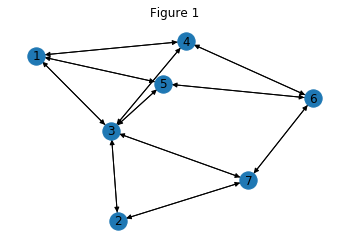

In [226]:
#Creamos el grafo, en este caso, no direccionado. En caso de ser direccionado, añadir TODOS los vertices a la variable
#edges y cambiar direcflag = 1
directflag = 1
num_nodes = 7
gcompleto = False
edges = [(1,3),(1,4),(1,5),(2,3),(2,7),(3,4),(3,5),(3,7),(4,6),(5,6),(6,7)]
# edges = [(1,2),(2,3),(3,4),(4,5),(2,1)]
E = len(edges)
edges_grph = createEdges(edges, directflag)
edges_grph.sort()
G = createGraph(1,num_nodes+1,edges_grph) 


# Distancia

Definimos la distancia entre dos vertices $v_1$ y $v_2$ de G, que denotamos como $d_G(v_1,v_2)$, se define como el largo de la trayectoria mas corta que conecta los vertices $v_1$ y $v_2$, si no existe, entonces $d_G(v_1,v_2)=\infty$

## Ejemplo:
Si deseamos calcular $d_G(6,2)$ dado el grafo de la Figura 1 tenemos que buscar todas las rutas desde 6 a 2 y quedarnos con la mas corta.

#### Calculo de trayectorias:

-  $d_G(6,2) = (6,4), (4,1), (1,3), (3,2) =  4$
-  $d_G(6,2) = (6,5), (5,3), (3,2) = 3$
-  $d_G(6,2) = (6,7), (7,2) = 2$

Por lo que la trayectoria escogida es la ultima, dado que es la mas corta. $d_G(6,2) = 2$

In [227]:
#Calculo de distancia para un solo vertice
#El primer valor es el grafo definido arriba, luego el v1 y finalmente el v2
n = nx.shortest_path_length(G,3,6)
print(n)

2


In [228]:
#Calculo de TODAS las distancias de un nodo.
def distancia(v1, G):
    for v2 in range(1,8):
        if v1 == v2:
            continue
        distancia = nx.shortest_path_length(G,v1,v2)
        print("LA DISTANCIA DE ", v1, " y ", v2, "ES ", distancia)
distancia(6,G)

LA DISTANCIA DE  6  y  1 ES  2
LA DISTANCIA DE  6  y  2 ES  2
LA DISTANCIA DE  6  y  3 ES  2
LA DISTANCIA DE  6  y  4 ES  1
LA DISTANCIA DE  6  y  5 ES  1
LA DISTANCIA DE  6  y  7 ES  1


# Excentricidad

La excentricidad del vertice $v_1$ es la maxima distancia entre $v_1$  y $v_2 \in V$ con $v_1 \neq v_2$, la denotamos como $e_G$.

## Ejemplo:
Determinar $e_G(3)$.

#### Calculo de distancias $d_G(3,n)$, con $n \in {1,2,4,5,6,7}$

- $d_G(3,1) = 1$
- $d_G(3,2) = 1$
- $d_G(3,4) = 1$
- $d_G(3,5) = 1$
- $d_G(3,6) = 2$
- $d_G(3,7) = 1$

Dado que debemos escoger la distancia maxima, el valor de $e_G(3) = 2$. 

In [229]:
def excentricidad(G):
    excentricidadList = []
    for v1 in range(1,8):
        aux = []
        for i in range(1,8):
            if i == v1:
                continue
            e = nx.shortest_path_length(G,v1,i)
            aux.append(e)
        print("LA EXCENTRICIDAD ", "DE ", v1, " ES ",np.max(np.asarray(aux)))
        excentricidadList.append(np.max(np.asarray(aux)))
    return excentricidadList
excentricidad = excentricidad(G) #ejecutamos la funcion

LA EXCENTRICIDAD  DE  1  ES  2
LA EXCENTRICIDAD  DE  2  ES  2
LA EXCENTRICIDAD  DE  3  ES  2
LA EXCENTRICIDAD  DE  4  ES  2
LA EXCENTRICIDAD  DE  5  ES  2
LA EXCENTRICIDAD  DE  6  ES  2
LA EXCENTRICIDAD  DE  7  ES  2


# Diametro y radio

Se define el diametro como la mayor distancia entre cualquier par de vertices, es decir, el mayor valor de las excentricidades. Para obtener el valor del diametro debemos calcular el valor de todas las excentricidad, lo que supone calcular el valor de todas las distancias y quedarnos con la de mayor valor.

In [243]:
#Calculo diametro
diametro = np.max(excentricidad)
print(diametro)

2


En contraparte, el radio es la menor de las excentricidades.

In [231]:
#Calculo radio
radio = np.min(excentricidad)
print(radio)

2


# Matriz de adyacencia

In [232]:
def createMatriz(edges_grphs):
    edges = edges_grph 
    aux1 = edges[-1][1]
    aux2 = edges[-1][0]
    if aux1 > aux2:
        shape = aux1
    else:
        shape = aux2
    matrix = np.zeros((shape+1,shape+1))
    for e in edges:
        matrix[e[0],e[1]] = 1
    return matrix[1:,1:].astype('int')

In [233]:
A_G = createMatriz(edges_grph)
print(A_G)

[[0 0 1 1 1 0 0]
 [0 0 1 0 0 0 1]
 [1 1 0 1 1 0 1]
 [1 0 1 0 0 1 0]
 [1 0 1 0 0 1 0]
 [0 0 0 1 1 0 1]
 [0 1 1 0 0 1 0]]


# Matriz de incidencia

La matriz de incidencia es una matriz binaria, denotado por B(G), donde $B(G) = (b_{i,j})$.

Los valores los toma siguiendo el siguiente criterio:
- $b_{i,j} = 1$, si $i \in e_j$
- $b_{i,j} = 0$, si $i \notin e_j$

Donde $e_j \in E$, es decir teniendo los vertices de nuestro grafo el valor $e_1 = (1,3)$, es decir que el valor $b_{1,1} = 1$ dado que $i = 1$ e $i$ esta presente en el vertice $e_1 = (1,3)$.

$e_1 = (1,3)$, entonces, $b_{2,1} = 0$, dado que $i = 2$ e $i$ $\bf no$ esta presente en el vertice $e_1 = (1,3)$.

$e_7 = (3,5)$, entonces, $b_{5,7} = 1$, dado que $i = 5$ e $i$ esta presente en el vertice $e_7 = (3,5)$.

$e_7 = (3,5)$, entonces, $b_{4,7} = 0$, dado que $i = 4$ e $i$ $\bf no$ esta presente en el vertice $e_7 = (3,5)$.

In [234]:
B_G = np.zeros((num_nodes,E)).astype('int')
for j,e in enumerate(edges):
    for i in range(0,7):
        if i+1 in e:
            B_G[i,j] = 1
print(B_G)

[[1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 1 0 1 1 1 0 0 0]
 [0 1 0 0 0 1 0 0 1 0 0]
 [0 0 1 0 0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 1 0 0 1 0 0 1]]


# Espectro de la matriz de adyacencia

El espectro de $G$ sedefine como los valores propios de $A_G$.

In [235]:
espectro = LA.eig(A_G)
espectro = np.round(np.sort(espectro[0]), decimals=4)
for e in espectro:
    print(e)

-2.5104
-1.3685
-1.1255
0.0
0.5397
1.16
3.3047


# Teoremas

**Teorema 1** (Propiedades del espectro de la matriz de adyacencia)
Dado el grafo $G=(V,E)$ y su matriz de adyacencia $A(G)$. Denotemos $\lambda_i \in A(G)$ y ordenamos de menos a mayo (como esta arriba). El espectro de $A(G)$ **cumple** que: 

**1.-**

$\frac{2||E||}{|V|} \leq \lambda_n \leq \sqrt{\frac{2||E||(|V|-1)}{|V|}}$


In [236]:
E = len(edges)
V = num_nodes
def teorema11(edges):
    print(np.round((2*E/V),4),"<=",espectro[-1],"<=",np.sqrt(((2*E*(V-1))/V)))
teorema11(edges) #Llamar a la propiedad 1

3.1429 <= 3.3047 <= 4.342481186734475


**2.-** Si $G$ es completo, entonces $\lambda_i = |V|-1$ si $i=n$ y $\lambda_i=-1$ en caso contrario.

In [240]:
def teorema12(espectro, gcompleto):
    if gcompleto is True:
        for e in espectro:
            if e == num_nodes:
                print(e, V-1, "si son iguales se cumple")
            else:
                print(e,-1, "si son iguales se cumple")
teorema12(espectro, False) #Segunda variable, dice si es completo o no

**3.-** $\lambda_n - \lambda_{n-1} \leq |V|$

In [121]:
def teorema13(espectro):
    print(np.round(espectro[num_nodes-1]-espectro[num_nodes-2],4),"<=",V)
teorema13(espectro)

2.1447 <= 7


**4.-** Si el diametro de G es $d$, entonces $A(G)$ tiene al menos $d+1$ valores propios.

In [244]:
def teorema14(espectro):
    print("El diametro de G es ", diametro,".")
    print("El grafo G tiene ",len(espectro)," valores propios.")
    if len(espectro) >= diametro + 1:
        print("Por lo que el teorema 4 se cumple.")
    else:
        print("El teorema 4 no se cumple.")
teorema14(espectro)

El diametro de G es  2 .
El grafo G tiene  7  valores propios.
Por lo que el teorema 4 se cumple.


**5.-** PENDIENTE

**6.-** Si G es un grafo de linea entonces $\lambda_1 \geq -2$

In [123]:
def teorema16(espectro):
    if espectro[0] >= -2:
        print("Teorema 6 se cumple dado que ", espectro[0]," es mayor que -2")
    else:
        print("Teorema 6 NO se cumple dado que ", espectro[0]," es menor que -2")
teorema16(espectro)

Teorema 6 NO se cumple dado que  -2.5104  es menor que -2


**7.-** Si $G_1$ es un subgrafo inducido de G con espectro ${\lambda_1}^{(1)} \leq {\lambda_2}^{(1)} \leq ... \leq {\lambda_n}^{(1)}$. Se cumple que $\lambda_1 \leq {\lambda_1}^{(1)} \leq {\lambda_n}^{(1)} \leq \lambda_n$

# Trayectorias de largo fijo

In [249]:
def trayectoriadelargofijo(A_G,r,v1,v2):
    A_G_new = np.matrix(A_G)**r
    print(A_G_new)
    print("EL valor de trayectoria de largo fijo 1 de los vertices 2,7 es ", A_G_new[v2-1,v1-1])
trayectoriadelargofijo(A_G,4,2,7)

[[21 12 26 14 14 19 13]
 [12 10 15 12 12 10 11]
 [26 15 42 16 16 29 15]
 [14 12 16 25 25  6 21]
 [14 12 16 25 25  6 21]
 [19 10 29  6  6 23  6]
 [13 11 15 21 21  6 20]]
EL valor de trayectoria de largo fijo 1 de los vertices 2,7 es  11


# Grado de los vertices

In [251]:
A_G_2 = np.matrix(A_G)**2
print(A_G_2)

[[3 1 2 1 1 2 1]
 [1 2 1 1 1 1 1]
 [2 1 5 1 1 3 1]
 [1 1 1 3 3 0 2]
 [1 1 1 3 3 0 2]
 [2 1 3 0 0 3 0]
 [1 1 1 2 2 0 3]]


In [253]:
gradodelosvertices = np.diag(A_G_2)
print(gradodelosvertices)

[3 2 5 3 3 3 3]


# Laplaciano

In [262]:
L_G = np.zeros((V,V)).astype(int)
L_G = L_G - A_G
for i in range(V):
    L_G[i,i] = gradodelosvertices[i]
print(L_G)

[[ 3  0 -1 -1 -1  0  0]
 [ 0  2 -1  0  0  0 -1]
 [-1 -1  5 -1 -1  0 -1]
 [-1  0 -1  3  0 -1  0]
 [-1  0 -1  0  3 -1  0]
 [ 0  0  0 -1 -1  3 -1]
 [ 0 -1 -1  0  0 -1  3]]
